# K-means on Streaming Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
# Define the streaming K-means algorithm

class StreamingKMeans:
  def __init__(self, n_clusters, batch_size=100):
    self.n_clusters = n_clusters
    self.batch_size = batch_size
    self.kmeans = MiniBatchKMeans(n_clusters=self.n_clusters, n_init='auto', batch_size= self.batch_size)

  def partial_fit(self, X):
    self.kmeans.partial_fit(X)  

  def predict(self, X):
    return self.kmeans.predict(X)

  def get_centers(self):
       return self.kmeans.cluster_centers_



## Generate data

In [5]:
n_samples = 10000

# Simulated
streaming_data = np.random.randn(n_samples, 2)

## Apply the Mini-batch K-means

In [9]:
batch_size = 100

s_kmeans = StreamingKMeans(n_clusters=3)

# Train the model on streaming data

for i in range(0, n_samples, batch_size):
  batch = streaming_data [i: i+batch_size]
  s_kmeans.partial_fit(batch)


In [10]:
labels = s_kmeans.predict(streaming_data)
labels

array([0, 1, 1, ..., 1, 2, 2], dtype=int32)

In [11]:
centers = s_kmeans.get_centers()
centers

array([[-1.00126196,  0.18332966],
       [ 0.33539597, -0.99529397],
       [ 0.66734151,  0.76889262]])

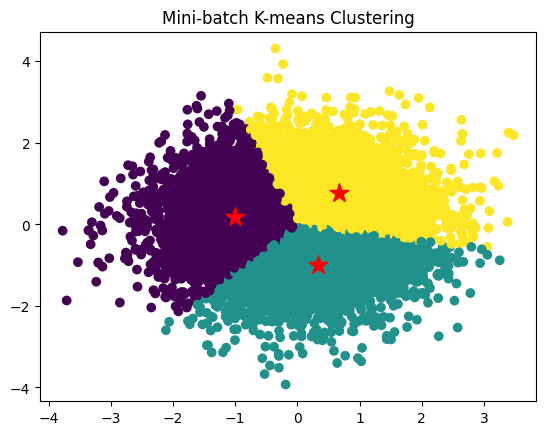

In [12]:
plt.scatter(streaming_data[:,0], streaming_data[:,1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.title('Mini-batch K-means Clustering')
plt.show()